<h1 style="color: blue;"><b>INTRODUCTION</b></h1>
Data Scientist and Data Analyst jobs require a specialized set of skills. I want to identify the most in demand skills in the Glassdoor job descriptions for a Data Scientist and Data Analyst, so I know which ones  to focus on developing first to be a more highly rated candidate during my job search. Understanding where these jobs are located and in which industries will allow me to more efficiently focus my search in the appropriate state and industry to increase my odds of getting a job as a Data Scientist or Data Analyst.

In [1]:
# Import needed libraries for project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from collections import Counter

In [2]:
# Load data from .CSV
df = pd.read_csv('/Users/johnharmer/Desktop/Data_Science_Job_Skills/Capstone 2/glassdoor_jobs.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD)
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD)
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD)


<h3 style="color: blue;"><b>DATA CLEANING</b></h3>

In [4]:
# Filter job titles for 'Data Scientist' or 'Data Analyst'
df_filtered = df[df['Job Title'].str.contains('Data Scientist|Data Analyst', case=False, na=False)].copy()

In [5]:
# Filter job titles for 'Data Scientist' or 'Data Analyst'
df_filtered.loc[:, 'State'] = df_filtered['Location'].apply(
    lambda x: 'Remote' if 'remote' in x.lower() else x.split(',')[-1].strip())

In [6]:
# Extract the state from the Location column, treating "Remote" as its own category
df_filtered['State'] = df_filtered['Location'].apply(lambda x: 'Remote' if 'remote' in x.lower() else x.split(',')[-1].strip())

# Mapping of full state names to their 2-letter abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
    'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Function to map full state names to abbreviations
def map_state_to_abbreviation(state):
    state = state.strip()
    if state in state_abbrev:
        return state_abbrev[state]
    return state

# Drop unwanted entries
df_filtered = df_filtered[~df_filtered['State'].isin(['United States', '-1', 'Point Loma', 'New York State', 'Manhattan'])]

# Apply the state abbreviation mapping (keeping 'Remote' as is)
df_filtered['State'] = df_filtered['State'].apply(lambda x: x if x == 'Remote' else map_state_to_abbreviation(x))

In [7]:
df_filtered.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,State
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD),Remote
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD),CA
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),GA
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD),WA
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD),TX


In [8]:
# Common skills, technologies, and software to look for in job descriptions
skills_list = ['Python', 'SQL', 'Excel', 'R', 'Tableau', 'Power BI', 'Machine Learning', 
               'Deep Learning', 'Statistics', 'Data Mining', 'Hadoop', 'Spark', 
               'TensorFlow', 'Keras', 'scikit-learn', 'NLP', 'AWS', 'Azure', 'Cloud', 'Data Analysis']

# Define a function to extract skills from the job descriptions
def extract_skills(description):
    found_skills = set()
    for skill in skills_list:
        if re.search(r'\b' + re.escape(skill) + r'\b', description, re.IGNORECASE):
            found_skills.add(skill)
    return ', '.join(found_skills)

# Apply the extract_skills function to the Job Description column and create a new 'Extracted Skills' column
df_filtered['Extracted Skills'] = df_filtered['Job Description'].apply(extract_skills)

# Display the updated dataframe with the new 'Extracted Skills' column
print(df_filtered[['Job Title', 'State', 'Extracted Skills']].head())

                                   Job Title   State  \
0                             Data Scientist  Remote   
1  2024 University Graduate - Data Scientist      CA   
2          Data Scientist – Entry Level 2024      GA   
3                           Data Scientist 2      WA   
4       Entry Level Data Scientist 2023/2024      TX   

                                    Extracted Skills  
0                                   Machine Learning  
1  SQL, Python, R, Cloud, Machine Learning, Table...  
2                            Machine Learning, Cloud  
3                            Machine Learning, Cloud  
4                                                     


In [9]:
# Concatenate all the extracted skills into one list
all_skills = df_filtered['Extracted Skills'].str.split(', ').explode()

# Count the occurrences of each skill
skill_counts = Counter(all_skills)

# Convert the Counter object to a DataFrame for easier plotting
skills_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

# Display the skill counts to the user
print(skills_df)

               Skill  Count
8                       666
0   Machine Learning    327
2             Python    130
6         Statistics    113
3                  R     97
11     Data Analysis     78
10       Data Mining     70
1                SQL     66
4              Cloud     59
5            Tableau     52
9                NLP     41
13             Excel     31
14     Deep Learning     28
15             Spark     15
12        TensorFlow     13
16               AWS     12
17            Hadoop      9
20             Azure      8
7       scikit-learn      7
18          Power BI      7
19             Keras      2


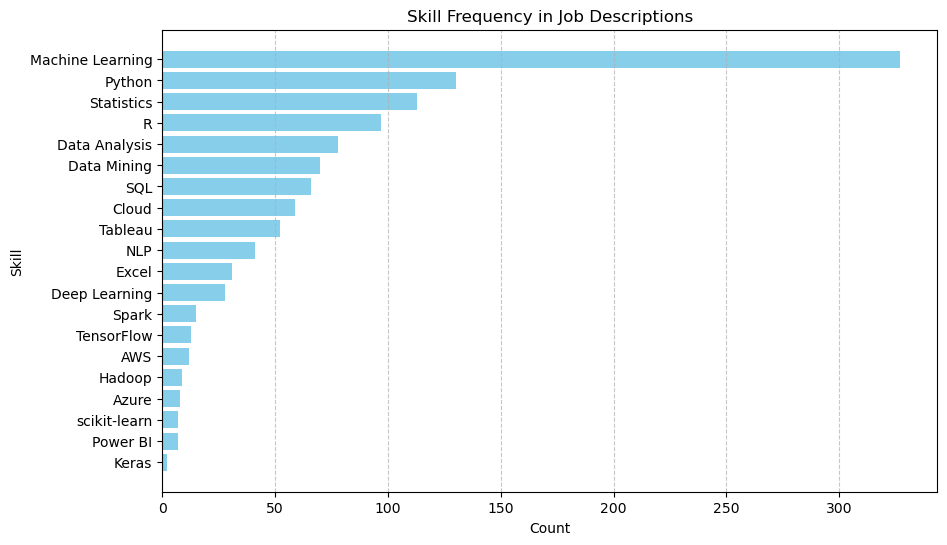

In [10]:
# Remove empty skill entries and plot the skill counts
skills_df = skills_df[skills_df['Skill'] != '']

# Create bar plot to show Skills count
plt.figure(figsize=(10, 6))
plt.barh(skills_df['Skill'], skills_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Skill Frequency in Job Descriptions')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines along the x-axis
plt.show()

<b><h3>Most In-Demand Skills</b></h3>
<b>Top 15 Skills:</b> Machine Learning, Python, Statistics, R, Data Analysis, Data Mining, SQL, Cloud, Tableau, NLP, Excel, Deep Learning, Spark, TensorFlow, AWS<br>

<h3 style="color: blue;"><b>EXPLORATORY DATA ANALYSIS</b></h3>

In [11]:
# Count how many unique job titles are in the df.
job_titles = df['Job Title'].value_counts()
print(job_titles)

Job Title
Data Scientist                          431
-1                                      123
Senior Data Scientist                   111
Sr. Data Scientist                       50
DATA SCIENTIST                           45
                                       ... 
Staff Data Scientist - Search             1
Staff Data Scientist - Deep Learning      1
Data Engineer - AI/ML                     1
Principal Data Scientist, Applied AI      1
Data Scientist - Hybrid Opportunity       1
Name: count, Length: 374, dtype: int64


In [12]:
# Count occurrences of 'Data Scientist' and 'Data Analyst' separately
data_scientist_count = df_filtered['Job Title'].str.contains('Data Scientist', case=False, na=False).sum()
data_analyst_count = df_filtered['Job Title'].str.contains('Data Analyst', case=False, na=False).sum()

# Display counts
print(data_scientist_count, data_analyst_count)

1166 32


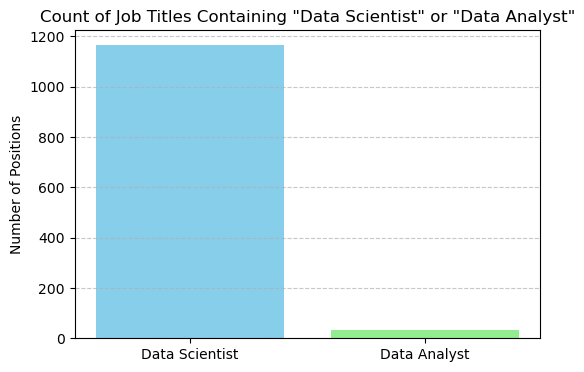

In [13]:
# Create a DataFrame to hold the counts for plotting
job_title_data = pd.DataFrame({
    'Job Title': ['Data Scientist', 'Data Analyst'],
    'Count': [data_scientist_count, data_analyst_count]})

# Create a bar plot to visualize the counts
plt.figure(figsize=(6, 4))
plt.bar(job_title_data['Job Title'], job_title_data['Count'], color=['skyblue', 'lightgreen'])
plt.ylabel('Number of Positions')
plt.title('Count of Job Titles Containing "Data Scientist" or "Data Analyst"')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Count the number of unique industries in the df_filtered.
unique_industries_count = df_filtered['Industry'].nunique()

unique_industries_count

68

In [15]:
# Count the occurrences of each Industry.
unique_industries_count = df_filtered['Industry'].value_counts()
unique_industries_count

Industry
-1                                         166
Information Technology Support Services    160
Health Care Services & Hospitals           104
Enterprise Software & Network Solutions     70
Aerospace & Defense                         70
                                          ... 
Rail Transportation                          1
Food & Beverage Stores                       1
Beauty & Personal Accessories Stores         1
Pet Care & Veterinary                        1
Photography                                  1
Name: count, Length: 68, dtype: int64

In [16]:
# Remove industries where the value is '-1'
industry_counts_cleaned = unique_industries_count[unique_industries_count.index != '-1']

# Print the cleaned industry counts with the industry names as the index
print(industry_counts_cleaned)

Industry
Information Technology Support Services    160
Health Care Services & Hospitals           104
Enterprise Software & Network Solutions     70
Aerospace & Defense                         70
Insurance Carriers                          59
                                          ... 
Rail Transportation                          1
Food & Beverage Stores                       1
Beauty & Personal Accessories Stores         1
Pet Care & Veterinary                        1
Photography                                  1
Name: count, Length: 67, dtype: int64


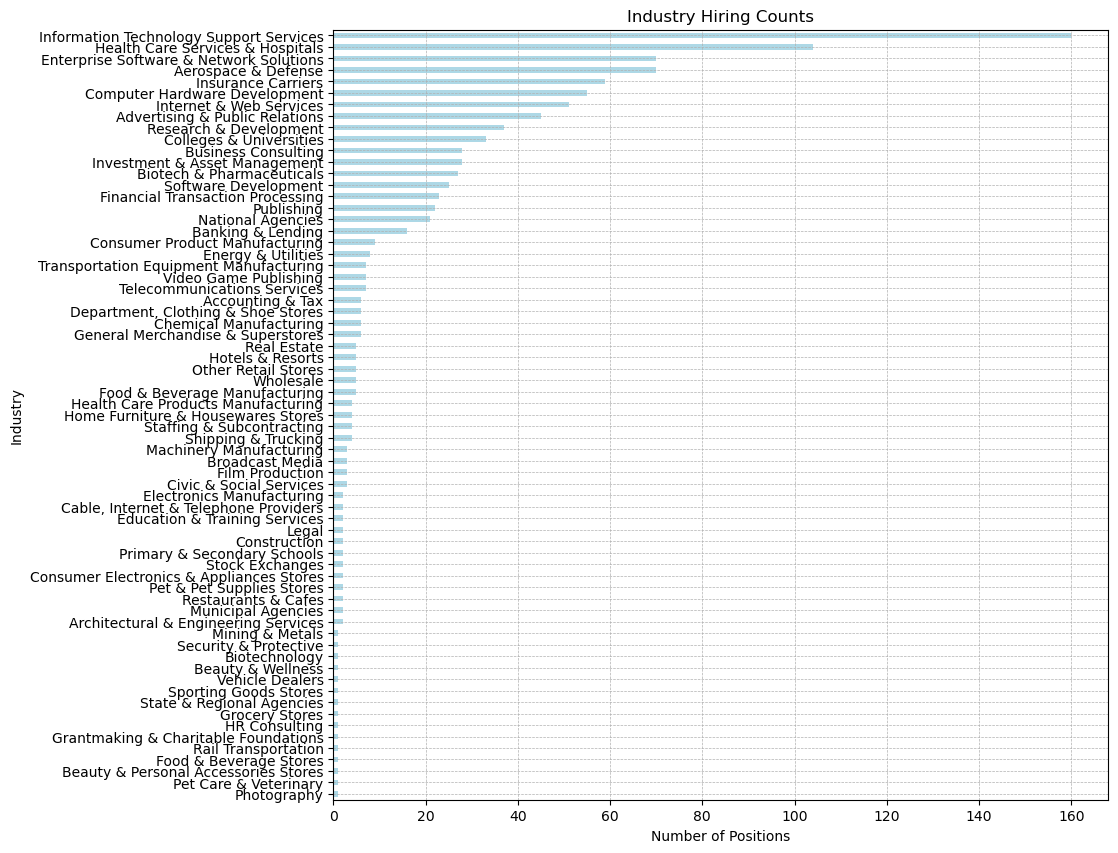

In [17]:
# Plot the counts of each industry to help identify which industry is more likely to be hiring.
plt.figure(figsize=(10, 10))
industry_counts_cleaned.plot(kind='barh', color='lightblue')
plt.xlabel('Number of Positions')
plt.ylabel('Industry')
plt.title('Industry Hiring Counts')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

<b><h3>RESULTS</b></h3>
1198 jobs with job titles containing Data Scientist(1166) or Data Analyst(32).<br>

<b><h4>Top Industries Hiring:</b></h4>
Information Technology, Finance, Healthcare, Enterprise Software & Network Solutions, Aerospace & Defense.
IT support services has the most job openings.

In [18]:
# Count how many jobs are located in each state, including remote positions
jobs_by_state = df_filtered['State'].value_counts()

# Display the results using standard print
print(jobs_by_state)

State
Remote    218
CA        195
VA        105
TX         77
NJ         77
MA         59
OH         46
CO         39
PA         38
NC         36
MI         30
MD         30
NY         28
IL         27
UT         26
FL         20
IA         19
CT         18
WA         16
GA         14
DC         13
WI         10
MO          8
MN          7
AZ          6
AL          4
LA          4
DE          3
AR          3
NM          2
KY          2
NE          2
OR          2
IN          2
ND          1
MS          1
NH          1
TN          1
KS          1
NV          1
ME          1
RI          1
Name: count, dtype: int64


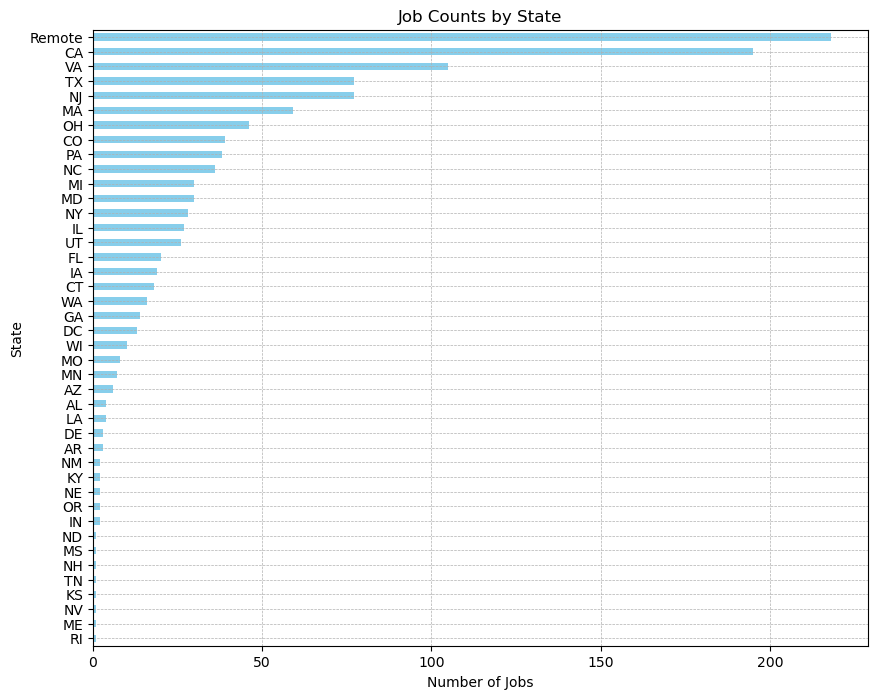

In [19]:
# Plot a bar chart to show job counts by state
plt.figure(figsize=(10, 8))
jobs_by_state.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Jobs')
plt.ylabel('State')
plt.title('Job Counts by State')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

<h3><b>Top 10 states with job openings</b></h3>
Remote    218<br>
CA        195<br>
VA        105<br>
TX         77<br>
NJ         77<br>
MA         59<br>
CO         39<br>
PA         38<br>
NC         36<br>
MI         30<br>

In [20]:
# Function to clean and parse the salary column data
def clean_salary(salary):
    if 'K' in salary:
        salary = salary.replace('K', '').replace('$', '').replace('Employer Provided Salary:', '').replace('(Glassdoor est.)', '').strip()
        if '-' in salary:
            # Split into minimum and maximum salary and compute the average
            min_salary, max_salary = salary.split('-')
            avg_salary = (int(min_salary) + int(max_salary)) / 2
            return avg_salary
        else:
            # Single salary value
            return float(salary.strip())

In [21]:
# Apply the clean_salary function to the Salary Estimate column
df_filtered['Avg Salary'] = df_filtered['Salary Estimate'].apply(clean_salary)

# Fill NaNs with a placeholder value (e.g., 0) and convert to integers
df_filtered['Avg Salary'].fillna(0, inplace=True)
df_filtered['Avg Salary'] = df_filtered['Avg Salary'].astype(int)

# Display 'Salary Estimate' and 'Avg Salary' to confirm.
df_filtered[['Salary Estimate', 'Avg Salary']]

,Salary Estimate,Avg Salary
0,-1,0
1,Employer Provided Salary:$83K - $153K,118
2,Employer Provided Salary:$71K - $133K,102
3,Employer Provided Salary:$94K - $183K,138
4,$48K - $78K (Glassdoor est.),63
...,...,...
1494,-1,0
1496,Employer Provided Salary:$145K,145
1497,Employer Provided Salary:$79K - $120K,99
1498,$53K - $77K (Glassdoor est.),65


In [22]:
# Display summary statistics for numerical features
summary_stats_numerical = df_filtered.describe()

# Display summary statistics for categorical features
summary_stats_categorical = df_filtered.describe(include=['O'])

# Check for missing values
missing_values = df_filtered.isnull().sum()

summary_stats_numerical, summary_stats_categorical, missing_values

(            Rating      Founded   Avg Salary
 count  1194.000000  1194.000000  1194.000000
 mean      3.376466  1442.756281    95.299832
 std       1.618110   873.582152    61.072372
 min      -1.000000    -1.000000     0.000000
 25%       3.400000    -1.000000    68.000000
 50%       3.900000  1967.000000   106.000000
 75%       4.200000  2003.000000   130.000000
 max       5.000000  2022.000000   334.000000,
              Job Title Salary Estimate  \
 count             1194            1194   
 unique             299             510   
 top     Data Scientist              -1   
 freq               418             232   
 
                                           Job Description    Company Name  \
 count                                                1194            1194   
 unique                                                676             593   
 top     About InterDigital\nInterDigital develops fund...  Analytica\n3.4   
 freq                                                   

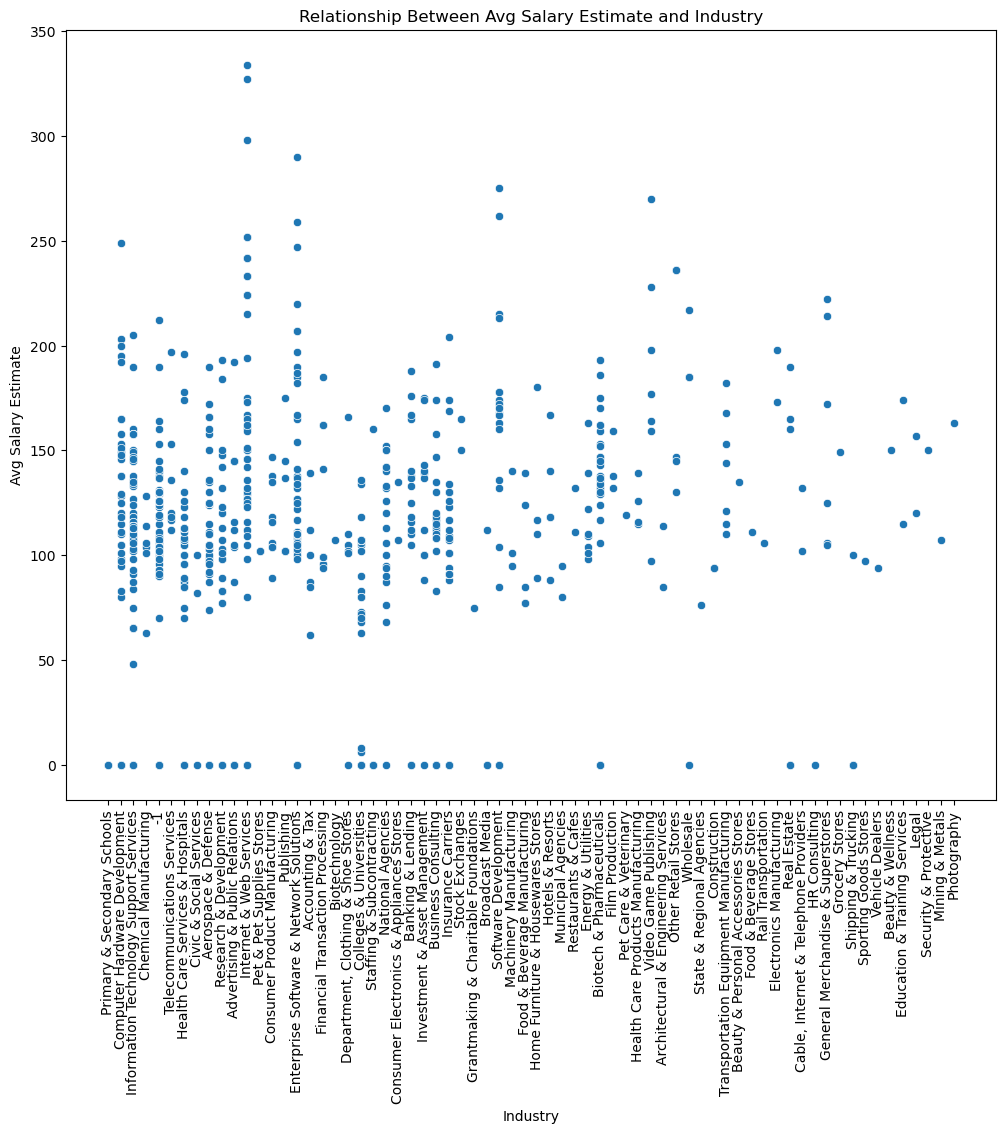

In [23]:
# Scatter plot of average salary estimate vs. industry
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_filtered, x='Industry', y='Avg Salary')
plt.title('Relationship Between Avg Salary Estimate and Industry')
plt.xlabel('Industry')
plt.ylabel('Avg Salary Estimate')
plt.xticks(rotation=90)
plt.show()

Companies from the internet and software industires tend to pay higher wages. That being said, most of the industires are paying ~$100K or more for Data Scientist and Data Analyst jobs.

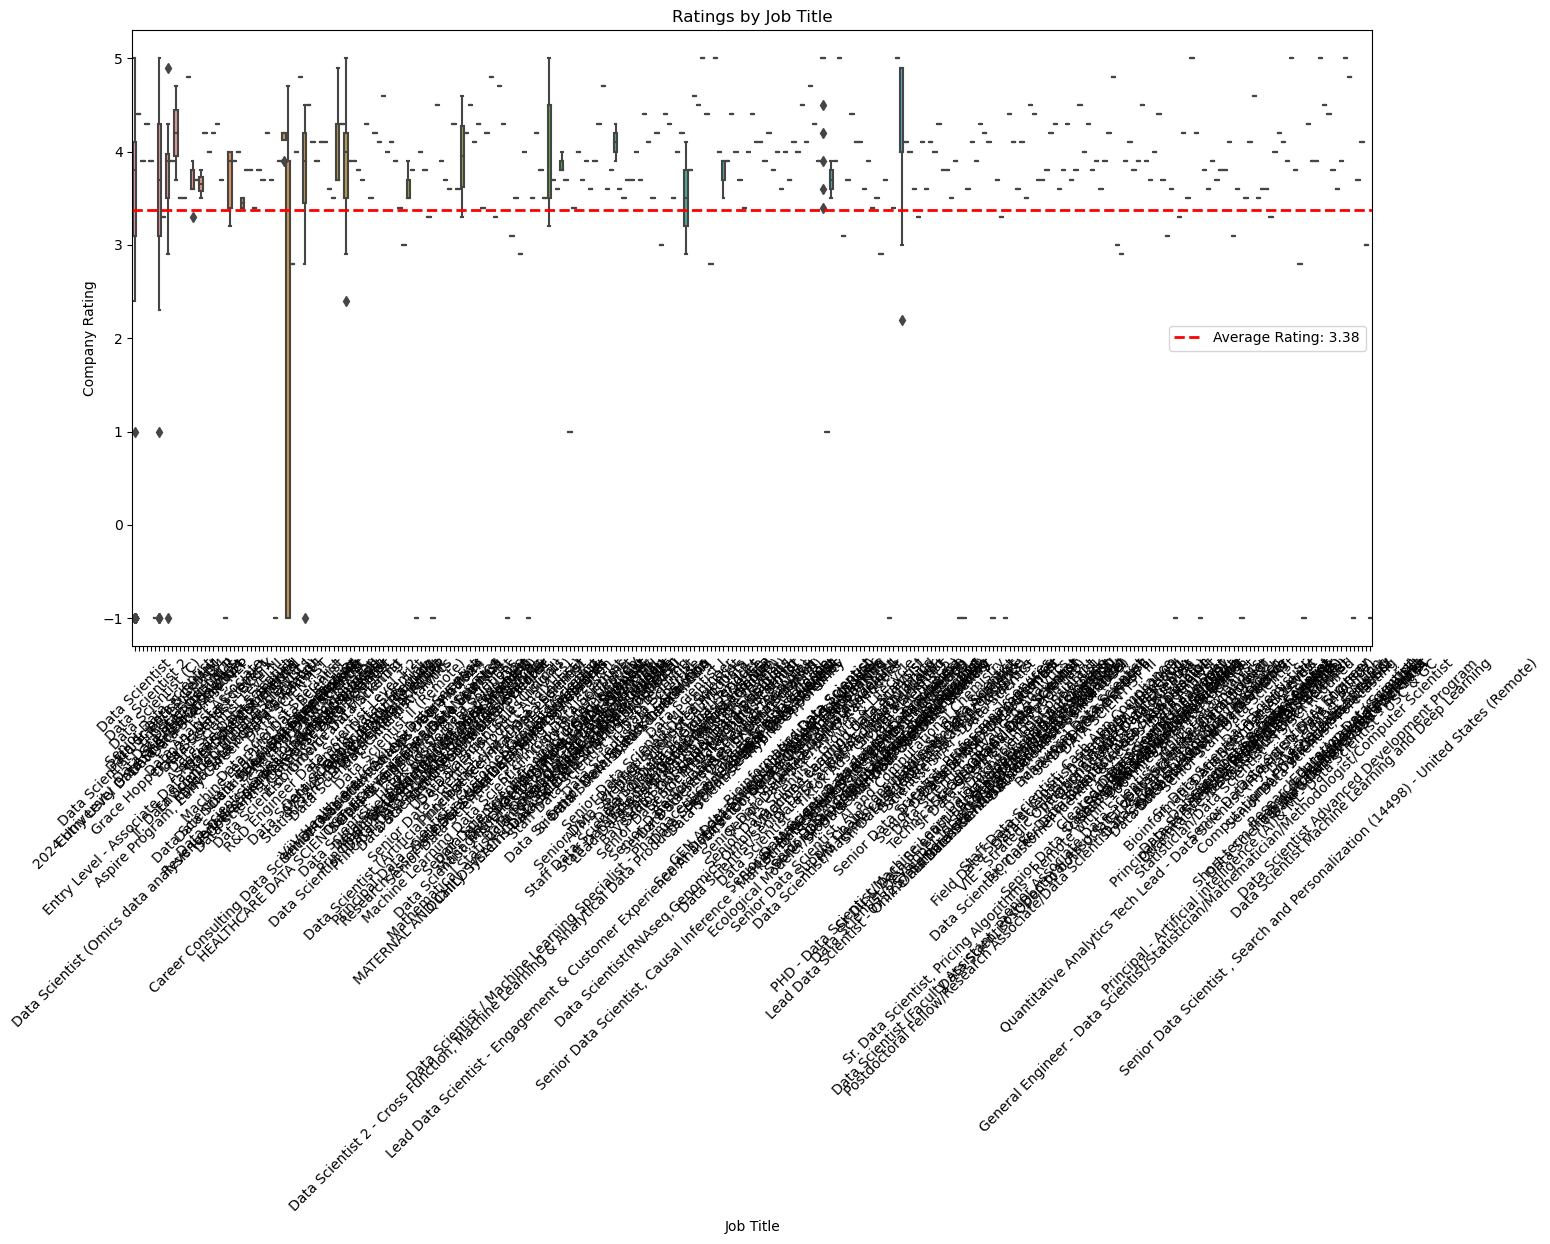

In [24]:
# Filter data for box plot visualization
job_ratings = df_filtered[df_filtered['Job Title'].str.contains('Data Scientist|Data Analyst', case=False, na=False)]

# Box plot of Rating by job title
plt.figure(figsize=(16, 8))
sns.boxplot(x='Job Title', y='Rating', data=df_filtered)

# Calculate the overall average rating
average_rating = df_filtered['Rating'].mean()

# Add a horizontal line at the average rating
plt.axhline(y=average_rating, color='red', linestyle='--', linewidth=2, label=f'Average Rating: {average_rating:.2f}')

plt.title('Ratings by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Company Rating')
plt.xticks(rotation=45)

plt.legend()  # Add a legend to describe the average line

plt.show()

The box plot shows the distribution of company ratings across all Data Scientist and Data Analyst jobs. Both roles have a similar distribution of ratings with the mean rating around 3.4. This indicates that companies hiring for these rols generally have good ratings.

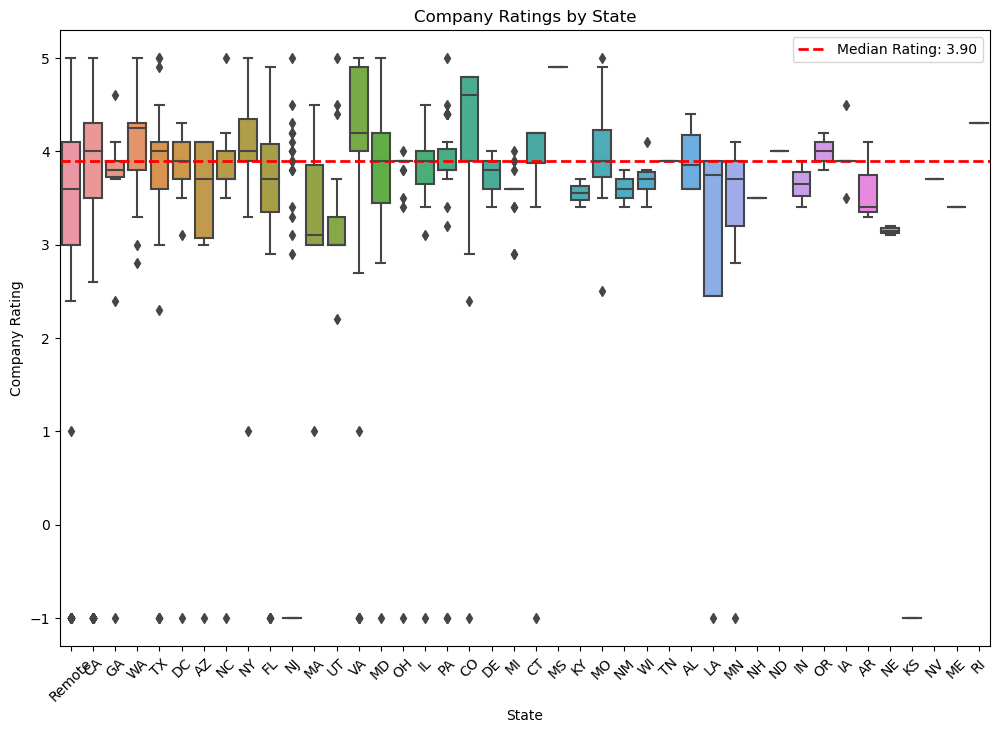

In [25]:
# Box plot of ratings by state
plt.figure(figsize=(12,8))
sns.boxplot(x='State', y='Rating', data=df_filtered)

# Calculate the overall average rating
median_rating = df_filtered['Rating'].median()

# Add a horizontal line at the average rating
plt.axhline(y=median_rating, color='red', linestyle='--', linewidth=2, label=f'Median Rating: {median_rating:.2f}')

plt.title('Company Ratings by State')
plt.xlabel('State')
plt.ylabel('Company Rating')
plt.xticks(rotation=45)
plt.legend()  # Add a legend to describe the average line

plt.show()

The box plot shows the distribution of company ratings across all states with Data Scientist and Data Analyst roles available. Most states have median ratings of 3.5 to 4.1, indicating generally positive company ratings across the US.

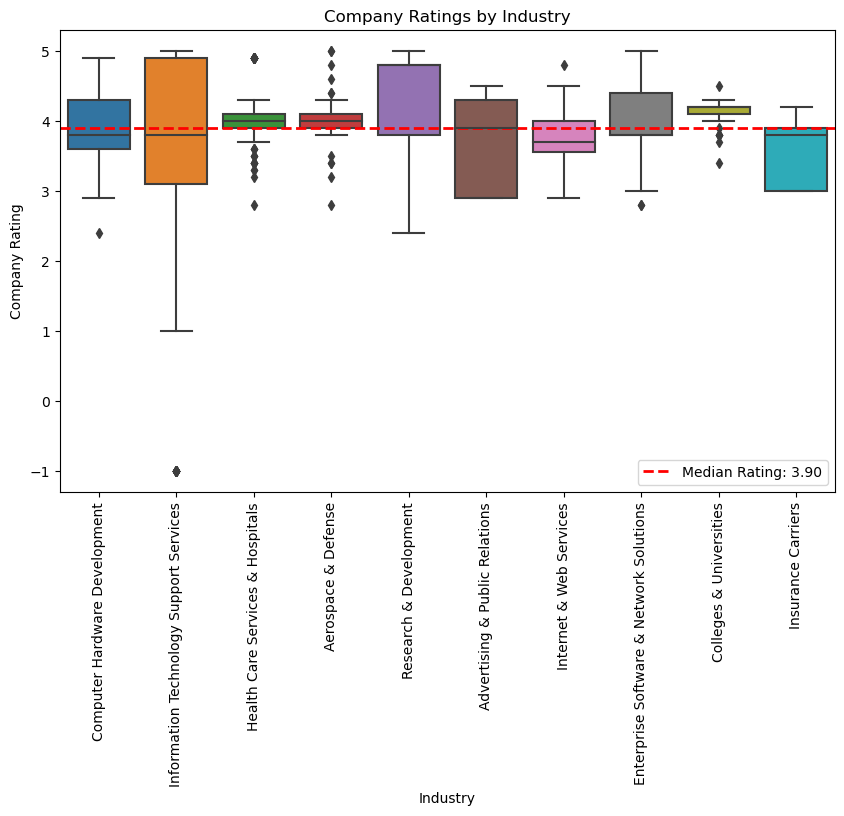

In [26]:
# Filter out rows where Industry is '-1' (assuming -1 is stored as a string)
df_filtered = df_filtered[df_filtered['Industry'] != '-1']

# Count the occurrences of each industry
industry_counts = df_filtered['Industry'].value_counts()

# Filter for the top 10 industries
top_10_industries = industry_counts.head(10).index

# Filter the dataframe to include only rows from the top 10 industries
df_top_10_industries = df_filtered[df_filtered['Industry'].isin(top_10_industries)]

# Box plot of ratings by top industries
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Rating', data=df_top_10_industries)

# Add a horizontal line at the median rating
plt.axhline(y=median_rating, color='red', linestyle='--', linewidth=2, label=f'Median Rating: {median_rating:.2f}')
            
plt.title('Company Ratings by Industry')
plt.xlabel('Industry')
plt.ylabel('Company Rating')
plt.xticks(rotation=90)
plt.legend()  # Add a legend to describe the median line

plt.show()

The box plot shows the distribution of company ratings across the top 10 industries. Most industries have median ratings around 3.8 to 4.0, with some variability in the distribution. This indicates that while most industries maintain good company ratings, there are some differences in the spread of these ratings.

<b>Most In-Demand Skills:</b><br>
<b>Top Skills:</b> Analytics, Machine learning, Analysis, AI, Modeling, Python, Statistics, Statistical analysis, AWS, SQL, Data visualization, SAS, Data analysis, Tableau, Data mining.<br>
These skills are critical for candidates looking to secure a Data Scientist or Data Analyst position.<br><br>
<b>Top Locations for Jobs:</b><br>
<b>Top Locations:</b> Major states with tech hubs have the most job opportunities.<br>
Visualization shows the distribution of these jobs across each state.<br><br>
<b>Top Industries Hiring:</b><br>
<b>Key Industries:</b> Information Technology, Finance, Healthcare, Enterprise Software & Network Solutions, and Aerospace & Defense.
Visualization shows the distribution of these jobs across various industries.<br><br>
<b>Data Relationships:</b><br>
<b>Box Plots:</b> Similar distributions of company ratings across job titles, locations, and industries.<br><br>
<b>Recommendations</b><br>
<b>1. Skill Development:</b> Prioritize learning Machine learning, Analytics, Python, Statistics, SQL, and Data visualization. These are the some of the most frequently mentioned skills in job descriptions.<br>
<b>2. Targeted Job Search:</b> Focus on the top locations and industries identified. This will increase the efficiency of my job search.<br>
<b>3. Continuous Analysis:</b> Regularly update the analysis to capture trends and changes in the job market.

<h3 style="color: blue;"><b>MODELING</b></h3>

In [27]:
# Identify all unique skills from the 'Extracted Skills' column
unique_skills = set(skill for skills_list in df_filtered['Extracted Skills'].dropna().str.split(', ') for skill in skills_list)

# Create binary columns for each skill (multi-label target)
for skill in unique_skills:
    df_filtered[f'Target_{skill}'] = df_filtered['Extracted Skills'].apply(lambda x: 1 if skill in x else 0)

# Define the target variables (multi-label format)
y = df_filtered[[f'Target_{skill}' for skill in unique_skills]]

# Check and remove skills that only have one class (all 0s or all 1s)
valid_skills = [col for col in y.columns if y[col].nunique() > 1]

# Filter the target dataframe to only include valid skills (with both 0s and 1s)
y_valid = y[valid_skills]

# Define features (e.g., 'Rating', 'State', 'Industry')
X = df_filtered[['Rating', 'State', 'Industry']]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['State', 'Industry'], drop_first=True)

# Handle missing values in 'Rating' by filling with the mean
X_encoded['Rating'].fillna(X_encoded['Rating'].mean(), inplace=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_valid, test_size=0.2, random_state=42)

In [28]:
# Random Forest Classifier with label encoding
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap it in MultiOutputClassifier to handle multi-label classification
multi_rf_model = MultiOutputClassifier(rf_model, n_jobs=-1)

# Train the Random Forest model on the training data
multi_rf_model.fit(X_train, y_train)

# Make predictions for each skill on the test set
y_pred_rf = multi_rf_model.predict(X_test)

# Initialize dictionaries to store the evaluation metrics for each skill
rf_evaluation_metrics = {
    'Skill': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

# Loop through each skill (target column) to compute the metrics
for skill in valid_skills:
    y_pred_skill_rf = y_pred_rf[:, y_valid.columns.get_loc(skill)]
    y_true_skill_rf = y_test[skill].values
    
    acc_rf = accuracy_score(y_true_skill_rf, y_pred_skill_rf)
    precision_rf = precision_score(y_true_skill_rf, y_pred_skill_rf, zero_division=0)
    recall_rf = recall_score(y_true_skill_rf, y_pred_skill_rf, zero_division=0)
    f1_rf = f1_score(y_true_skill_rf, y_pred_skill_rf, zero_division=0)
    cm_rf = confusion_matrix(y_true_skill_rf, y_pred_skill_rf)
    
    # Store the metrics
    rf_evaluation_metrics['Skill'].append(skill)
    rf_evaluation_metrics['Accuracy'].append(acc_rf)
    rf_evaluation_metrics['Precision'].append(precision_rf)
    rf_evaluation_metrics['Recall'].append(recall_rf)
    rf_evaluation_metrics['F1 Score'].append(f1_rf)
    rf_evaluation_metrics['Confusion Matrix'].append(cm_rf)

# Convert the metrics dictionary to a DataFrame for easy viewing
rf_evaluation_df = pd.DataFrame(rf_evaluation_metrics)

# Display the evaluation metrics
print(rf_evaluation_df[['Skill', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])

                      Skill  Accuracy  Precision    Recall  F1 Score
0              Target_Spark  0.990291   1.000000  0.333333  0.500000
1             Target_Python  0.898058   0.600000  0.375000  0.461538
2                Target_SQL  0.946602   0.571429  0.333333  0.421053
3                  Target_R  0.927184   0.733333  0.500000  0.594595
4                Target_NLP  0.975728   1.000000  0.166667  0.285714
5         Target_Statistics  0.941748   0.846154  0.523810  0.647059
6              Target_Excel  0.980583   0.000000  0.000000  0.000000
7           Target_Power BI  0.985437   0.000000  0.000000  0.000000
8       Target_scikit-learn  0.990291   0.000000  0.000000  0.000000
9              Target_Azure  0.995146   0.000000  0.000000  0.000000
10             Target_Cloud  0.941748   0.200000  0.111111  0.142857
11  Target_Machine Learning  0.810680   0.687500  0.578947  0.628571
12     Target_Deep Learning  0.970874   0.500000  0.166667  0.250000
13             Target_Keras  1.000

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [29]:
# Use class_weight='balanced' to help with the imbalanced classes.
# Instantiate the Random Forest model with class_weight='balanced'
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Wrap it in MultiOutputClassifier to handle multi-label classification
multi_rf_model_balanced = MultiOutputClassifier(rf_model_balanced, n_jobs=-1)

# Train the Random Forest model on the training data
multi_rf_model_balanced.fit(X_train, y_train)

# Make predictions for each skill on the test set
y_pred_rf_balanced = multi_rf_model_balanced.predict(X_test)

# Initialize a dictionary to store the evaluation metrics
rf_evaluation_metrics = {
    'Skill': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

# Loop through each skill (target column) to compute the metrics
valid_skills = y_train.columns  # Assuming your y_train DataFrame contains skill names as columns
for skill in valid_skills:
    y_pred_skill_rf = y_pred_rf_balanced[:, y_test.columns.get_loc(skill)]
    y_true_skill_rf = y_test[skill].values
    
    # Calculate metrics for the current skill
    acc_rf = accuracy_score(y_true_skill_rf, y_pred_skill_rf)
    precision_rf = precision_score(y_true_skill_rf, y_pred_skill_rf, zero_division=0)
    recall_rf = recall_score(y_true_skill_rf, y_pred_skill_rf, zero_division=0)
    f1_rf = f1_score(y_true_skill_rf, y_pred_skill_rf, zero_division=0)
    cm_rf = confusion_matrix(y_true_skill_rf, y_pred_skill_rf)
    
    # Store the metrics in the dictionary
    rf_evaluation_metrics['Skill'].append(skill)
    rf_evaluation_metrics['Accuracy'].append(acc_rf)
    rf_evaluation_metrics['Precision'].append(precision_rf)
    rf_evaluation_metrics['Recall'].append(recall_rf)
    rf_evaluation_metrics['F1 Score'].append(f1_rf)
    rf_evaluation_metrics['Confusion Matrix'].append(cm_rf)

# Convert the metrics dictionary to a DataFrame for easy viewing
rf_evaluation_df = pd.DataFrame(rf_evaluation_metrics)

# Display the evaluation metrics
print(rf_evaluation_df[['Skill', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])

                      Skill  Accuracy  Precision    Recall  F1 Score
0              Target_Spark  0.990291   0.666667  0.666667  0.666667
1             Target_Python  0.888350   0.526316  0.416667  0.465116
2                Target_SQL  0.927184   0.384615  0.416667  0.400000
3                  Target_R  0.927184   0.733333  0.500000  0.594595
4                Target_NLP  0.985437   1.000000  0.500000  0.666667
5         Target_Statistics  0.941748   0.800000  0.571429  0.666667
6              Target_Excel  0.980583   0.000000  0.000000  0.000000
7           Target_Power BI  0.985437   0.000000  0.000000  0.000000
8       Target_scikit-learn  0.985437   0.000000  0.000000  0.000000
9              Target_Azure  0.985437   0.000000  0.000000  0.000000
10             Target_Cloud  0.936893   0.300000  0.333333  0.315789
11  Target_Machine Learning  0.815534   0.693878  0.596491  0.641509
12     Target_Deep Learning  0.980583   0.750000  0.500000  0.600000
13             Target_Keras  0.995

<h3>Conclusion:</h3>
The tuned Random Forest model with class balancing generally shows improvements in recall and F1 scores, particularly for difficult-to-predict classes. The accuracy remains stable overall. However, precision dropped for a few cases, possibly due to the class balancing leading to more false positives. The model performed better for skills like Target_Spark, Target_NLP, and Target_Data Mining, but it still struggles with certain skills like Target_Azure, Target_Keras, and Target_Power BI.

<h3>Summary of all 3 models:</h3>

<b>Logistic Regression:</b> Best for environments where simplicity, speed, and interpretability are critical, but it does not perform well for complex, non-linear problems.

<b>Random Forest:</b> A strong middle ground, offering good performance for a wide variety of tasks while being more scalable and efficient than the stacked model. It balances complexity and predictive power, making it a good general-purpose model, especially when computational resources are available.

<b>Stacked Model (LightGBM + XGBoost):</b> Best for extracting maximum performance in complex problems, particularly for tasks like Deep Learning and Machine Learning where it showed improvement. However, the high computational cost and maintenance requirements make it suitable for environments with abundant computational resources and the ability to handle model complexity.

<h3>Recommendation:</h3>

For most use cases, especially where performance and computational efficiency are both important, **Random Forest** is the best overall option. It provides a good balance of performance, scalability, and maintenance cost.
**Stacked Model** is preferable when the highest predictive accuracy is required, particularly for complex non-linear problems, and when computational resources and time for tuning are not limiting factors.